In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for columns in data.columns:
    print(data[columns].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BH

In [7]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [8]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
data["location"].value_counts()


,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [10]:
data["location"] = data["location"].fillna(data["location"].mode().iloc[0])
data["location"].isnull().sum()

np.int64(0)

In [11]:
data["size"].head()



,size
0,2 BHK
1,4 Bedroom
2,3 BHK
3,3 BHK
4,2 BHK


In [12]:
data["size"]=data["size"].fillna(data["size"].mode().iloc[0])
data["size"].head()

,size
0,2 BHK
1,4 Bedroom
2,3 BHK
3,3 BHK
4,2 BHK


In [13]:
data["size"].isnull().sum()

np.int64(0)

In [14]:
data["bath"].head(10)

,bath
0,2.0
1,5.0
2,2.0
3,3.0
4,2.0
5,2.0
6,4.0
7,4.0
8,3.0
9,6.0


In [15]:
print(data["bath"].median())

2.0


In [16]:
data["bath"] = data["bath"].fillna(data["bath"].median())
data["bath"].isnull().sum()

np.int64(0)

In [17]:
data["size"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [18]:
data.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,5502
total_sqft,0
bath,0
balcony,609
price,0


In [19]:
data.drop(columns=["area_type","availability","society","balcony"],inplace=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [21]:
data.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [22]:
print(data["size"].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [23]:
data["bhk"] = data["size"].str.split().str.get(0).astype(int)

In [24]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


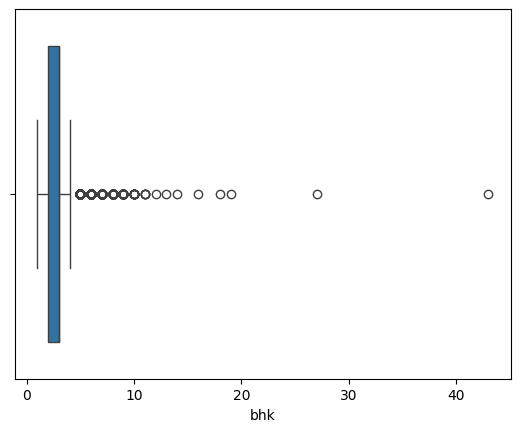

In [25]:
sns.boxplot(x=data["bhk"])
plt.show()

In [26]:
q1=data["bhk"].quantile(0.25)
q3=data["bhk"].quantile(0.75)

iqr=q3-q1

In [27]:
q1,q3,iqr

(np.float64(2.0), np.float64(3.0), np.float64(1.0))

In [28]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [29]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [30]:
def convertrange(x):
    temp=x.split("_")
    if(len(temp))==2:
        return (float[temp[0]]+float[temp[1]])/2
    try:
        return float(x)
    except:
        return None

In [31]:
data["total_sqft"]=data["total_sqft"].apply(convertrange)

In [32]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
data["total_sqft"].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [34]:
data["price_per_sqft"]=data["price"]*100000/data["total_sqft"]

In [35]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [36]:
data["location"].value_counts()

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [37]:
data["location"]=data["location"].apply(lambda x: x.strip())
location_count=data["location"].value_counts()

In [38]:
location_count

,count
location,
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Duddanahalli,1
Doddanakunte,1
Jogupalya,1


In [39]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

,count
location,
Basapura,10
Dairy Circle,10
Nagappa Reddy Layout,10
Naganathapura,10
Sector 1 HSR Layout,10
...,...
Duddanahalli,1
Doddanakunte,1
Jogupalya,1


In [40]:
data["location"]=data["location"].apply(lambda x:"other" if x in location_count_less_10 else x)

In [41]:
data["location"].value_counts()

,count
location,
other,2885
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Tindlu,11
Marsur,11
2nd Phase Judicial Layout,11


In [42]:
q1=data["total_sqft"].quantile(0.25)
q3=data["total_sqft"].quantile(0.75)
iqr=q3-q1


In [43]:
lowerlimit_bhk=q1 - 1.5 * iqr
upperlimit_bhk=q3 + 1.5 * iqr
lowerlimit_bhk,upperlimit_bhk

(np.float64(245.0), np.float64(2525.0))

In [44]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [45]:
(data['total_sqft']/data['bhk']).describe()

,0
count,13073.000000
mean,573.254923
std,389.887823
min,0.250000
25%,472.000000
50%,551.000000
75%,625.000000
max,26136.000000


In [46]:
data = data[((data["total_sqft"]/data['bhk']) >= 300 )]

In [47]:
data.shape

(12329, 7)

In [48]:
data.price_per_sqft.describe()

,price_per_sqft
count,12329.000000
mean,6322.476758
std,4187.479096
min,267.829813
25%,4207.119741
50%,5300.000000
75%,6938.483548
max,176470.588235


In [49]:
def remove_outliers_sqft(df):

  df_output=pd.DataFrame()

  for key, subdf in df.groupby('location'):

      m=np.mean(subdf.price_per_sqft)

      st=np.std(subdf.price_per_sqft)

      gen_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]

      df_output=pd.concat([df_output, gen_df], ignore_index =True)

  return df_output

data=remove_outliers_sqft(data)

data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000
mean,1502.509073,2.471979,91.091961,2.573525,5670.053950
std,873.650914,0.972143,86.208086,0.893533,2275.884448
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4242.424242
50%,1283.000000,2.000000,67.000000,2.000000,5183.823529
75%,1650.000000,3.000000,100.000000,3.000000,6451.612903
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [50]:
def bhk_outlier_remover (df):

    exclude_indices=np.array([])

    for location, location_df in df.groupby('location'):

        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):

            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
              }

        for bhk, bhk_df in location_df.groupby("bhk"):

            stats=bhk_stats.get(bhk-1)

            if stats and stats['count']>5:

                exclude_indices=np.append(exclude_indices, bhk_df [bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices,axis='index')

In [51]:
data = bhk_outlier_remover(data)

In [52]:
data.shape

(7227, 7)

In [53]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10144,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10145,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10148,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10149,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [54]:
data.drop(columns=["size","price_per_sqft"],inplace=True)

In [55]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [56]:
data.to_csv("Cleaned_data.csv")

In [57]:
x=data.drop(columns=["price"])
y=data['price']

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)

(5781, 4)
(1446, 4)


In [61]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']), remainder='passthrough')

In [62]:
Scaler = StandardScaler()

In [63]:
lr= LinearRegression()

In [64]:
pipe=make_pipeline(column_trans,Scaler,lr)

In [65]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [66]:
y_pred_lr=pipe.predict(X_test)

In [67]:
r2_score(y_test,y_pred_lr)

0.8436148070609132

In [68]:
new_data = pd.DataFrame({
    'location': ['Rajaji Nagar'],
    'total_sqft': [1500],
    'bath': [3],
    'bhk': [3]
})

predicted_price = pipe.predict(new_data)

print(f"Predicted price for new data: {predicted_price[0]}")

Predicted price for new data: 254.29428508015422


In [69]:
new_data = pd.DataFrame({
    'location': ['1st Block Jayanagar'],
    'total_sqft': [1200],
    'bath': [2],
    'bhk': [2]
})

predicted_price = pipe.predict(new_data)

print(f"Predicted price for new data: {predicted_price[0]*100000}")

Predicted price for new data: 20473122.939144447


In [70]:
new_data = pd.DataFrame({
    'location': ['7th Phase JP Nagar'],
    'total_sqft': [800],
    'bath': [1],
    'bhk': [3]
})

predicted_price = pipe.predict(new_data)

print(f"Predicted price for new data: {predicted_price[0]*100000}")

Predicted price for new data: 3834689.007086768


In [71]:
new_data = pd.DataFrame({
    'location': ['Marathahalli'],
    'total_sqft': [1310],
    'bath': [3],
    'bhk': [3]
})

predicted_price = pipe.predict(new_data)

print(f"Predicted price for new data: {predicted_price[0]}")

Predicted price for new data: 71.69859839322086
